# Objective:



In [1]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns; sns.set()
import warnings

from IPython.display import display
pd.options.display.max_columns = None
pd.options.display.max_rows = None
warnings.filterwarnings(module='sklearn*', action='ignore', category=DeprecationWarning)

In [2]:
## Read in the data

df_pitching = pd.read_csv(r'C:\Users\jbean\Dropbox\Other\Python\Baseball_2018\pitching_stats.csv')
df_batting = pd.read_csv(r'C:\Users\jbean\Dropbox\Other\Python\Baseball_2018\batting_stats.csv')
df_playoffs = pd.read_csv(r'C:\Users\jbean\Dropbox\Other\Python\Baseball_2018\mlb_playoff_teams.csv', encoding='latin-1',
                         index_col = 'team')

In [3]:
# Print sample of the data

df_playoffs.fillna('None', inplace=True)
print(df_playoffs.sample(5))

                                             postseason world_series
team                                                                
NYM   1969, 1973, 1986, 1988, 1999, 2000, 2006, 2015...   1969, 1986
HOU   1980, 1981, 1986, 1997, 1998, 1999, 2001, 2004...         2017
CHC   1906, 1907, 1908, 1910, 1918, 1929, 1932, 1935...         2016
WSA                                                None         None
DET   1907, 1908, 1909, 1934, 1935, 1940, 1945, 1968...         1984


In [4]:
print(df_pitching.sample(10))

      complete_game  earned_runs  hbp  hits  innings_pitched  hits_per_nine  \
864               8          627   72  1389           1435.1            8.7   
434              33          645   30  1374           1443.2            8.6   
1050              4          810   80  1538           1422.0            9.7   
1162              3          522   50  1260           1468.0            7.7   
722               8          635   30  1404           1461.0            8.6   
420              26          549   25  1399           1451.1            8.7   
622              26          716   60  1511           1447.0            9.4   
631              22          678   66  1421           1453.2            8.8   
182              26          639   43  1442           1440.0            9.0   
1212              2          602   47  1376           1460.0            8.5   

      homeruns  hr_per_nine  left_on_base  pitcher_age  pitchers_used  runs  \
864        196          1.2          1131         2

In [5]:
print(df_batting.sample(5))

     team  batters_used  batter_age  games  runs  hits  doubles  triples  \
892   SEA            40        31.2    162   814  1531      285       31   
660   SFG            36        28.4    115   504   963      159       32   
1325  CLE            41        28.0    162   818  1449      333       29   
1071  SEA            44        29.7    162   671  1498      285       20   
1178  HOU            50        26.6    162   583  1276      238       28   

      homeruns  rbi  stolen_base  walks  strikeouts  batting_average  \
892        152  771          137    629        1003            0.275   
660        123  472          114    364         719            0.249   
1325       212  780           88    604        1153            0.263   
1071       124  631           90    417         890            0.265   
1178       146  545          105    463        1365            0.236   

      on_base_percentage  slugging    ops  ops_plus  total_bases  \
892                0.350     0.419  0.769 

In [6]:
# Test to make sure the unique team names are the same in all lists 

list(sorted(set(df_pitching.team))) == list(sorted(set(df_batting.team))) == list(sorted(set(df_playoffs.index)))

True

# Data merging and cleaning

In [7]:
# Merge batting and pitching statistics for each team for each year

df_all = df_pitching.merge(df_batting, on=['year','team'], how='left', suffixes=('_pitching', '_batting'))

In [8]:
print(df_all.sample(5))

     complete_game  earned_runs  hbp  hits_pitching  innings_pitched  \
391             15          712   35           1554           1430.0   
65              57          498   33           1229           1469.1   
394             13          565   22           1327           1460.1   
564             18          726   24           1570           1450.1   
181             29          599   38           1421           1459.0   

     hits_per_nine  homeruns_pitching  hr_per_nine  left_on_base_pitching  \
391            9.8                155          1.0                   1229   
65             7.5                131          0.8                   1047   
394            8.2                122          0.8                   1147   
564            9.7                148          0.9                   1198   
181            8.8                 89          0.5                   1154   

     pitcher_age  pitchers_used  runs_pitching  so_per_nine  so_walk  \
391         27.5             20 

In [9]:
print(len(df_all))

1378


In [10]:
## Search for each year in the playoff data set for each team and mark 1 if the team made the playoffs

playoff_appearance = []

for i in range(1969, 2019):
    
    df = df_all[df_all.year == i]
    
    for team in df.team:
        
        df_plyoff = df_playoffs[df_playoffs.index == team]
        
        if df_plyoff.postseason.str.contains(str(i))[0]:
            
            playoff_appearance.append(1)
            
        else:
            playoff_appearance.append(0)

In [11]:
## Search for each year in the World Series data for each team and mark 1 if the team made the playoffs

world_series = []

for i in range(1969, 2019):
    
    df = df_all[df_all.year == i]
    
    for team in df.team:
        
        df_ws = df_playoffs[df_playoffs.index == team]
        
        if df_ws.world_series.str.contains(str(i))[0]:
            
            world_series.append(1)
            
        else:
            world_series.append(0)

In [12]:
## Veritfy that the length of the lists matches the length of the data set

len(playoff_appearance) == len(world_series) == len(df_all)

True

In [13]:
## Add the new variables to the data frame

df_all['playoffs'] = playoff_appearance
df_all['world_series'] = world_series

In [14]:
## Preview the new data

df_all.head()

,complete_game,earned_runs,hbp,hits_pitching,innings_pitched,hits_per_nine,homeruns_pitching,hr_per_nine,left_on_base_pitching,pitcher_age,pitchers_used,runs_pitching,so_per_nine,so_walk,strikeouts_pitching,team,walks_pitching,walks_per_nine,whip,year,batters_used,batter_age,games,runs_batting,hits_batting,doubles,triples,homeruns_batting,rbi,stolen_base,walks_batting,strikeouts_batting,batting_average,on_base_percentage,slugging,ops,ops_plus,total_bases,left_on_base_batting,playoffs,world_series
0,38,566,27,1334,1445.0,8.3,144,0.9,1076,27.5,18,631,5.6,2.04,893,ATL,438,2.7,1.226,1969,39,29.0,162,691,1411,195,22,141,640,59,485,665,0.258,0.321,0.380,0.700,95,2073,1107,1,0
1,50,463,22,1194,1473.2,7.3,117,0.7,1033,27.7,14,517,5.5,1.80,897,BAL,498,3.0,1.148,1969,30,28.1,162,779,1465,234,29,175,722,82,634,806,0.265,0.343,0.414,0.756,110,2282,1200,1,0
2,30,639,48,1423,1466.2,8.7,155,1.0,1257,26.5,19,736,5.7,1.37,935,BOS,685,4.2,1.437,1969,40,26.1,162,743,1381,234,37,197,701,41,658,923,0.251,0.333,0.415,0.748,103,2280,1164,0,0
3,25,566,51,1294,1438.1,8.1,126,0.8,1032,26.6,19,652,5.5,1.71,885,LAA,517,3.2,1.259,1969,45,26.1,163,528,1221,151,29,88,480,54,516,929,0.230,0.300,0.319,0.618,78,1694,1115,0,0
4,58,540,29,1366,1454.1,8.5,118,0.7,1129,27.6,17,611,6.3,2.14,1017,CHC,475,2.9,1.266,1969,41,29.2,163,720,1400,215,40,142,671,30,559,928,0.253,0.323,0.384,0.707,88,2121,1186,0,0


# Data preparation

In [15]:
## Define an ERA variable

df_all['era'] = df_all['earned_runs'] / df_all['innings_pitched']

In [16]:
## Standardize aggregated variables to a per-game variable

vars_to_standardize = ['complete_game','earned_runs','hbp','innings_pitched','homeruns_pitching','left_on_base_pitching',
                      'runs_pitching','runs_batting','hits_batting','doubles','triples','homeruns_batting','rbi','stolen_base',
                      'walks_batting','strikeouts_batting','total_bases','left_on_base_batting']

for var in vars_to_standardize:
    
    df_all[var] = df_all[var] / (df_all.games)

In [17]:
## Apply an annual MinMaxScaler transformation to variables

from sklearn.preprocessing import MinMaxScaler

df_scaled = pd.DataFrame()

for yr in list(set(df_all.year)):
    
    df = df_all[df_all.year == yr]
    
    df = df.select_dtypes(include=['float','int'])
    
    scaler = MinMaxScaler()
    
    df_transformed = scaler.fit_transform(df)
    
    df_scaled = df_scaled.append(pd.DataFrame(df_transformed))

In [18]:
## Add column names

df_scaled.columns = df_all.select_dtypes(include=['float','int']).columns
df_scaled.reset_index(drop=True, inplace=True)

In [19]:
## Add in additional variables that were lost in scaling

df_scaled['year'] = df_all['year']
df_scaled['team'] = df_all['team']

df_scaled['playoff_appearance'] = df_all['playoffs']
df_scaled['world_series'] = df_all['world_series']

# Predicting playoff teams

In [20]:
# Models

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

# Model evaluation

from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

# Model preparation

from sklearn.model_selection import train_test_split

In [21]:
## Preview the scaled data set

df_scaled.sample(5)

,complete_game,earned_runs,hbp,innings_pitched,hits_per_nine,homeruns_pitching,hr_per_nine,left_on_base_pitching,pitcher_age,runs_pitching,so_per_nine,so_walk,walks_per_nine,whip,batter_age,runs_batting,hits_batting,doubles,triples,homeruns_batting,rbi,stolen_base,walks_batting,strikeouts_batting,batting_average,on_base_percentage,slugging,ops,total_bases,left_on_base_batting,era,year,team,playoff_appearance,world_series
36,0.270245,0.730438,0.841627,0.150262,0.450000,0.519329,0.5,0.333151,0.722222,0.684098,0.421053,0.289157,0.529412,0.569930,0.804878,0.049504,0.061853,0.229599,0.077055,0.326405,0.051080,0.574770,0.506555,0.567657,0.151515,0.304348,0.113636,0.182609,0.010324,0.402344,0.758701,1970,MIL,0,0
237,0.285714,0.211978,0.678188,0.779373,0.235294,0.357375,0.2,0.863929,0.615385,0.250369,0.863636,0.677083,0.428571,0.282759,0.720000,0.574443,0.418732,0.434074,0.883040,0.443828,0.529331,0.991071,0.356554,0.908759,0.406250,0.472222,0.440476,0.435897,0.436893,0.093465,0.190611,1978,PIT,0,0
360,0.684211,0.609211,0.562500,0.642218,0.727273,0.513158,0.4,0.746914,0.693548,0.474015,0.200000,0.208333,0.181818,0.543568,0.637931,0.851240,1.000000,0.884899,0.853659,0.576471,0.867257,0.346341,0.333054,0.000000,1.000000,0.804878,0.804348,0.823077,0.849192,0.571234,0.588593,1983,MIL,0,0
1012,0.503623,0.437285,0.614907,0.387744,0.263158,0.030474,0.2,0.475343,0.424242,0.405091,0.238095,0.151351,0.714286,0.407738,1.000000,0.255741,0.149331,0.360931,0.876587,0.357254,0.259588,0.075879,0.368478,0.065077,0.125000,0.204082,0.373134,0.227723,0.279370,0.231113,0.434153,2006,SFG,0,0
497,0.035833,0.368000,0.351220,0.519516,0.333333,0.384493,0.4,0.364728,0.000000,0.333202,0.166667,0.235294,0.250000,0.373737,0.000000,0.407272,0.212067,0.389599,0.939855,0.464080,0.444251,0.328328,0.716425,0.724674,0.200000,0.322034,0.380952,0.312977,0.324496,0.460965,0.343586,1988,PIT,0,0


In [22]:
# Eliminate 2018 from the training and testing data; eliminate irrelevant variables

df_features = df_scaled.copy()
df_features = df_features.loc[df_scaled.year < 2018,:]
df_features.drop(['year','team','playoff_appearance','world_series'], axis=1, inplace=True)

df_targets = df_scaled.loc[df_scaled.loc[:,'year'] < 2018,'playoff_appearance']

In [23]:
## Test for correlation in best model for k

corr_matrix = df_features.loc[:,:].corr().abs()

## Select upper triangle of correlation matrix

upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

## Find index of feature columns with correlation greater than 0.8

to_drop = [column for column in upper.columns if any(upper[column] > 0.75)]

df_features.drop(to_drop, axis=1, inplace=True)

In [24]:
## Print the shape of the new data frame

df_features.shape

(1348, 20)

In [25]:
## Split the data into training and test sets; stratify the data by the target variable due to unbalanced data set

X_train, X_test, y_train, y_test = train_test_split(df_features, df_targets, random_state = 60, stratify=df_targets,
                                                   train_size = 0.7, test_size=0.3)

# Out of the box models

In [26]:
## Train the Logistic Regression model

lr = LogisticRegression(solver='lbfgs')

lr.fit(X_train, y_train)

print(classification_report(y_test, lr.predict(X_test)))
print('ROC AUC Score: %.2f' % roc_auc_score(y_test, lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       315
           1       0.65      0.51      0.57        90

   micro avg       0.83      0.83      0.83       405
   macro avg       0.76      0.72      0.73       405
weighted avg       0.82      0.83      0.82       405

ROC AUC Score: 0.72


In [27]:
## Train the Random Forest model

rf = RandomForestClassifier(n_estimators=10)

rf.fit(X_train, y_train)

print(classification_report(y_test, rf.predict(X_test)))
print('ROC AUC Score: %.2f' % roc_auc_score(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89       315
           1       0.62      0.40      0.49        90

   micro avg       0.81      0.81      0.81       405
   macro avg       0.73      0.67      0.69       405
weighted avg       0.79      0.81      0.80       405

ROC AUC Score: 0.67


In [28]:
## Train the K Neighbors Classifier model

knc = KNeighborsClassifier()
knc.fit(X_train, y_train)

print(classification_report(y_test, knc.predict(X_test)))
print('ROC AUC Score: %.2f' %roc_auc_score(y_test, knc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       315
           1       0.61      0.42      0.50        90

   micro avg       0.81      0.81      0.81       405
   macro avg       0.73      0.67      0.69       405
weighted avg       0.80      0.81      0.80       405

ROC AUC Score: 0.67


In [29]:
## Train the SVC model

svc = SVC(gamma = 'scale')

svc.fit(X_train, y_train)

print(classification_report(y_test, svc.predict(X_test)))
print('ROC AUC Score: %.2f' % roc_auc_score(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       315
           1       0.64      0.50      0.56        90

   micro avg       0.83      0.83      0.83       405
   macro avg       0.75      0.71      0.73       405
weighted avg       0.82      0.83      0.82       405

ROC AUC Score: 0.71


In [30]:
## Train the XGBoost Classifier model

xgb = XGBClassifier()

xgb.fit(X_train, y_train)

print(classification_report(y_test, xgb.predict(X_test)))
print('ROC AUC Score: %.2f' % roc_auc_score(y_test, xgb.predict(X_test)))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       315
           1       0.65      0.57      0.61        90

   micro avg       0.84      0.84      0.84       405
   macro avg       0.77      0.74      0.75       405
weighted avg       0.83      0.84      0.83       405

ROC AUC Score: 0.74


# Tuned models

In [31]:
# Set the hyperparameters for a Grid Search

params_lr = {'penalty':['l2'], 'C':[0.33, 0.67, 1.0], 'random_state':[60], 'solver':['newton-cg', 'lbfgs', 
                                                                                        'liblinear', 'sag', 'saga']}
params_rf = {'n_estimators':[10, 50, 100, 200, 300], 'criterion':['gini','entropy'], 'max_depth':[3, 5, 10, 20, None],
            'min_samples_split':[2, 5, 7, 10, 15], 'random_state':[60]}

params_knc = {'n_neighbors':[3, 5, 7, 9, 11], 'weights':['uniform', 'distance'], 'algorithm':['brute','auto','ball_tree'],
             'metric':['euclidean','minkowski']}

params_svc = {'C':[0.33, 0.67, 1.0], 'shrinking':[True, False], 'probability':[True, False], 'gamma':['scale','auto'],
              'random_state':[60]}

params_xgb = {'max_depth':[3, 5, 7], 'learning_rate':[0.03, 0.05, 0.07, 0.1, 0.13], 'n_estimators':[100, 150, 200, 250, 300],
             'booster':['gbtree','dart'], 'random_state':[60]}

In [32]:
## Import Grid Search and apply it to Logistic Regression

from sklearn.model_selection import GridSearchCV

gs_lr = GridSearchCV(LogisticRegression(), params_lr, cv = 5)

gs_lr.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l2'], 'C': [0.33, 0.67, 1.0], 'random_state': [60], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [33]:
print(classification_report(y_test, gs_lr.best_estimator_.predict(X_test)))
print('ROC AUC Score: %.2f' % roc_auc_score(y_test, gs_lr.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89       315
           1       0.65      0.51      0.57        90

   micro avg       0.83      0.83      0.83       405
   macro avg       0.76      0.72      0.73       405
weighted avg       0.82      0.83      0.82       405

ROC AUC Score: 0.72


In [34]:
## Apply Grid Search to Random Forest

gs_rf = GridSearchCV(RandomForestClassifier(), params_rf, cv = 5)

gs_rf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 50, 100, 200, 300], 'criterion': ['gini', 'entropy'], 'max_depth': [3, 5, 10, 20, None], 'min_samples_split': [2, 5, 7, 10, 15], 'random_state': [60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [35]:
print(gs_rf.best_params_)
print('\n')
print(classification_report(y_test, gs_rf.best_estimator_.predict(X_test)))
print('\n')
print('ROC AUC Score: %.2f' % roc_auc_score(y_test, gs_rf.best_estimator_.predict(X_test)))

{'criterion': 'gini', 'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 60}


              precision    recall  f1-score   support

           0       0.87      0.94      0.90       315
           1       0.70      0.50      0.58        90

   micro avg       0.84      0.84      0.84       405
   macro avg       0.79      0.72      0.74       405
weighted avg       0.83      0.84      0.83       405



ROC AUC Score: 0.72


In [36]:
## Apply Grid Search to KNeighbors Classifier

gs_knc = GridSearchCV(KNeighborsClassifier(), params_knc, cv = 5)

gs_knc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'weights': ['uniform', 'distance'], 'algorithm': ['brute', 'auto', 'ball_tree'], 'metric': ['euclidean', 'minkowski']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [37]:
print(gs_knc.best_params_)
print('\n')
print(classification_report(y_test, gs_knc.best_estimator_.predict(X_test)))
print('\n')
print('ROC AUC Score: %.2f' % roc_auc_score(y_test, gs_knc.best_estimator_.predict(X_test)))

{'algorithm': 'brute', 'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}


              precision    recall  f1-score   support

           0       0.85      0.92      0.89       315
           1       0.62      0.43      0.51        90

   micro avg       0.81      0.81      0.81       405
   macro avg       0.73      0.68      0.70       405
weighted avg       0.80      0.81      0.80       405



ROC AUC Score: 0.68


In [38]:
## Apply Grid Search to SVC

gs_svc = GridSearchCV(SVC(), params_svc, cv = 5)

gs_svc.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.33, 0.67, 1.0], 'shrinking': [True, False], 'probability': [True, False], 'gamma': ['scale', 'auto'], 'random_state': [60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [39]:
print(gs_svc.best_params_)
print('\n')
print(classification_report(y_test, gs_svc.best_estimator_.predict(X_test)))
print('\n')
print('ROC AUC Score: %.2f' % roc_auc_score(y_test, gs_svc.best_estimator_.predict(X_test)))

{'C': 1.0, 'gamma': 'scale', 'probability': True, 'random_state': 60, 'shrinking': True}


              precision    recall  f1-score   support

           0       0.87      0.92      0.89       315
           1       0.64      0.50      0.56        90

   micro avg       0.83      0.83      0.83       405
   macro avg       0.75      0.71      0.73       405
weighted avg       0.82      0.83      0.82       405



ROC AUC Score: 0.71


In [41]:
## Apply Grid Search to XGBoost Classifier

gs_xgb = GridSearchCV(XGBClassifier(), params_xgb, cv = 5)

gs_xgb.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [3, 5, 7], 'learning_rate': [0.03, 0.05, 0.07, 0.1, 0.13], 'n_estimators': [100, 150, 200, 250, 300], 'booster': ['gbtree', 'dart'], 'random_state': [60]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [42]:
print(gs_xgb.best_params_)
print('\n')
print(classification_report(y_test, gs_xgb.best_estimator_.predict(X_test)))
print('\n')
print('ROC AUC Score: %.2f' % roc_auc_score(y_test, gs_xgb.best_estimator_.predict(X_test)))

{'booster': 'gbtree', 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 250, 'random_state': 60}


              precision    recall  f1-score   support

           0       0.88      0.91      0.89       315
           1       0.64      0.54      0.59        90

   micro avg       0.83      0.83      0.83       405
   macro avg       0.76      0.73      0.74       405
weighted avg       0.82      0.83      0.82       405



ROC AUC Score: 0.73


# Voting Classifier

In [43]:
## Import Voting Classifier and fit with tuned models

from sklearn.ensemble import VotingClassifier

vc = VotingClassifier(estimators = [('lr', gs_lr.best_estimator_), ('rf', gs_rf.best_estimator_), 
                                      ('knc', gs_knc.best_estimator_), ('svc', gs_svc.best_estimator_), 
                                      ('xgb', gs_xgb.best_estimator_)])

vc.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=60, solver='newton-cg',
          tol=0.0001, verbose=0, warm_start=False)), ('rf', Rando...ate=60, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1))],
         flatten_transform=None, n_jobs=None, voting='hard', weights=None)

In [44]:
print(classification_report(y_test, vc.predict(X_test)))
print('\n')
print('ROC AUC Score: %.2f' % roc_auc_score(y_test, vc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90       315
           1       0.66      0.50      0.57        90

   micro avg       0.83      0.83      0.83       405
   macro avg       0.76      0.71      0.73       405
weighted avg       0.82      0.83      0.82       405



ROC AUC Score: 0.71


# 2018 Predictions

In [45]:
print('A naive model that randomly assigned playoff teams would be accurate in %.2f of its predictions' \
      % (df_all.playoffs.sum() / len(df_all)))

print('\n')

print('In 2018, we would expect that a randomly assigned model would be accurate in %.2f of its predictions' \
     % (df_all[df_all.year == 2018]['playoffs'].sum() / len(df_all[df_all.year == 2018])))

A naive model that randomly assigned playoff teams would be accurate in 0.22 of its predictions


In 2018, we would expect that a randomly assigned model would be accurate in 0.33 of its predictions


In [47]:
# Create 2018 feature and target variables

features_2018 = df_scaled.loc[df_scaled.year == 2018,:]
feature_cols = [col for col in features_2018 if col in df_features.columns]
features_2018 = features_2018[feature_cols]

targets_2018 = df_scaled[df_scaled.year == 2018]['playoff_appearance']

In [48]:
## Test the tuned Logistic Regression model on the 2018 data

preds_2018_lr = gs_lr.best_estimator_.predict(features_2018)

print(classification_report(targets_2018, preds_2018_lr))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.60      0.75        10

   micro avg       0.87      0.87      0.87        30
   macro avg       0.92      0.80      0.83        30
weighted avg       0.89      0.87      0.86        30



In [49]:
## Test the tuned Random Forest model on the 2018 data

preds_2018_rf = gs_rf.best_estimator_.predict(features_2018)

print(classification_report(targets_2018, preds_2018_rf))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.60      0.75        10

   micro avg       0.87      0.87      0.87        30
   macro avg       0.92      0.80      0.83        30
weighted avg       0.89      0.87      0.86        30



In [50]:
## Test the tuned K Neighbors model on the 2018 data

preds_2018_knc = gs_knc.best_estimator_.predict(features_2018)

print(classification_report(targets_2018, preds_2018_knc))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.60      0.75        10

   micro avg       0.87      0.87      0.87        30
   macro avg       0.92      0.80      0.83        30
weighted avg       0.89      0.87      0.86        30



In [51]:
## Example team predictions for 2018 data from the KNeighbors Classifier model

knc_preds = pd.DataFrame()
knc_preds['predictions'] = preds_2018_knc
knc_preds['team'] = df_scaled[df_scaled.year == 2018]['team'].values
knc_preds['playoffs'] = df_scaled[df_scaled.year == 2018]['playoff_appearance'].values
knc_preds = knc_preds[['team','playoffs','predictions']]

print(knc_preds)

   team  playoffs  predictions
0   ARI         0            0
1   ATL         1            0
2   BAL         0            0
3   BOS         1            1
4   CHC         1            0
5   CHW         0            0
6   CIN         0            0
7   CLE         1            1
8   COL         1            0
9   DET         0            0
10  HOU         1            1
11  KCR         0            0
12  LAA         0            0
13  LAD         1            1
14  MIA         0            0
15  MIL         1            1
16  MIN         0            0
17  NYM         0            0
18  NYY         1            0
19  OAK         1            1
20  PHI         0            0
21  PIT         0            0
22  SDP         0            0
23  SEA         0            0
24  SFG         0            0
25  STL         0            0
26  TBR         0            0
27  TEX         0            0
28  TOR         0            0
29  WSN         0            0


In [52]:
## Test the tuned SVC model on the 2018 data

preds_2018_svc = gs_svc.best_estimator_.predict(features_2018)

print(classification_report(targets_2018, preds_2018_svc))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.60      0.75        10

   micro avg       0.87      0.87      0.87        30
   macro avg       0.92      0.80      0.83        30
weighted avg       0.89      0.87      0.86        30



In [53]:
## Test the tuned XGBoost Classifier model on the 2018 data

preds_2018_xgb = gs_xgb.best_estimator_.predict(features_2018)

print(classification_report(targets_2018, preds_2018_xgb))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.80      0.89        10

   micro avg       0.93      0.93      0.93        30
   macro avg       0.95      0.90      0.92        30
weighted avg       0.94      0.93      0.93        30



In [54]:
## Test the tuned Voting Classifier model on the 2018 data

preds_2018_vc = vc.predict(features_2018)

print(classification_report(targets_2018, preds_2018_vc))

              precision    recall  f1-score   support

           0       0.83      1.00      0.91        20
           1       1.00      0.60      0.75        10

   micro avg       0.87      0.87      0.87        30
   macro avg       0.92      0.80      0.83        30
weighted avg       0.89      0.87      0.86        30



# Predictions with Probability

In [55]:
## Initiate a data frame with the predicted probabilities from the best performing model

xgb_proba = pd.DataFrame(gs_xgb.predict_proba(features_2018)[:,1])
xgb_proba.columns=['Probability']

In [56]:
## Add the target variable and mark the top 10 predicted playoff teams with a 1

xgb_proba['target'] = targets_2018.values
xgb_proba['top_preds'] = np.where(xgb_proba['Probability'] >= xgb_proba['Probability'].sort_values(ascending=False).\
                                  reset_index(drop=True)[9], 1, 0)

In [57]:
## Add the team variable

xgb_proba['team'] = df_scaled[df_scaled.year == 2018]['team'].values

In [58]:
print(xgb_proba)

    Probability  target  top_preds team
0      0.012478       0          0  ARI
1      0.609827       1          1  ATL
2      0.000321       0          0  BAL
3      0.838941       1          1  BOS
4      0.631968       1          1  CHC
5      0.000805       0          0  CHW
6      0.000753       0          0  CIN
7      0.768078       1          1  CLE
8      0.103153       1          0  COL
9      0.000852       0          0  DET
10     0.980935       1          1  HOU
11     0.000915       0          0  KCR
12     0.005764       0          0  LAA
13     0.997577       1          1  LAD
14     0.000458       0          0  MIA
15     0.064746       1          0  MIL
16     0.002214       0          0  MIN
17     0.001138       0          0  NYM
18     0.952370       1          1  NYY
19     0.956796       1          1  OAK
20     0.000744       0          0  PHI
21     0.001546       0          0  PIT
22     0.001011       0          0  SDP
23     0.009526       0          0  SEA


In [59]:
xgb_proba.sort_values(by='Probability', ascending=False)

,Probability,target,top_preds,team
13,0.997577,1,1,LAD
10,0.980935,1,1,HOU
19,0.956796,1,1,OAK
18,0.952370,1,1,NYY
3,0.838941,1,1,BOS
7,0.768078,1,1,CLE
4,0.631968,1,1,CHC
1,0.609827,1,1,ATL
25,0.493751,0,1,STL
29,0.105656,0,1,WSN


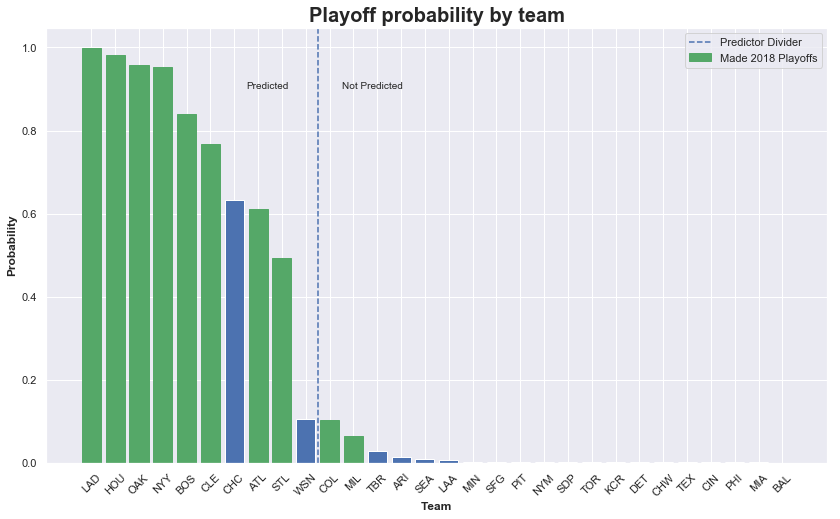

In [60]:
## Plot the playoff probabilities by team

ax = plt.figure(figsize=(14, 8))

ax = plt.bar(x=xgb_proba.sort_values(by='Probability', ascending=False)['team'], height=xgb_proba['Probability'].\
        sort_values(ascending=False))

ax[0].set_color('g')
ax[1].set_color('g')
ax[2].set_color('g')
ax[3].set_color('g')
ax[4].set_color('g')
ax[5].set_color('g')
ax[7].set_color('g')
ax[8].set_color('g')
ax[10].set_color('g')
ax[11].set_color('g')

plt.title('Playoff probability by team', fontweight='bold', fontsize=20)
plt.ylabel('Probability', fontweight='bold', fontsize=12)
plt.xlabel('Team', fontweight='bold', fontsize=12)

plt.axvline(9.5, linestyle='dashed')
plt.text(6.5, 0.9, s='Predicted')
plt.text(10.5, 0.9, s='Not Predicted')
plt.legend(labels=['Predictor Divider', 'Made 2018 Playoffs'])

plt.xticks(rotation=45)

plt.show()

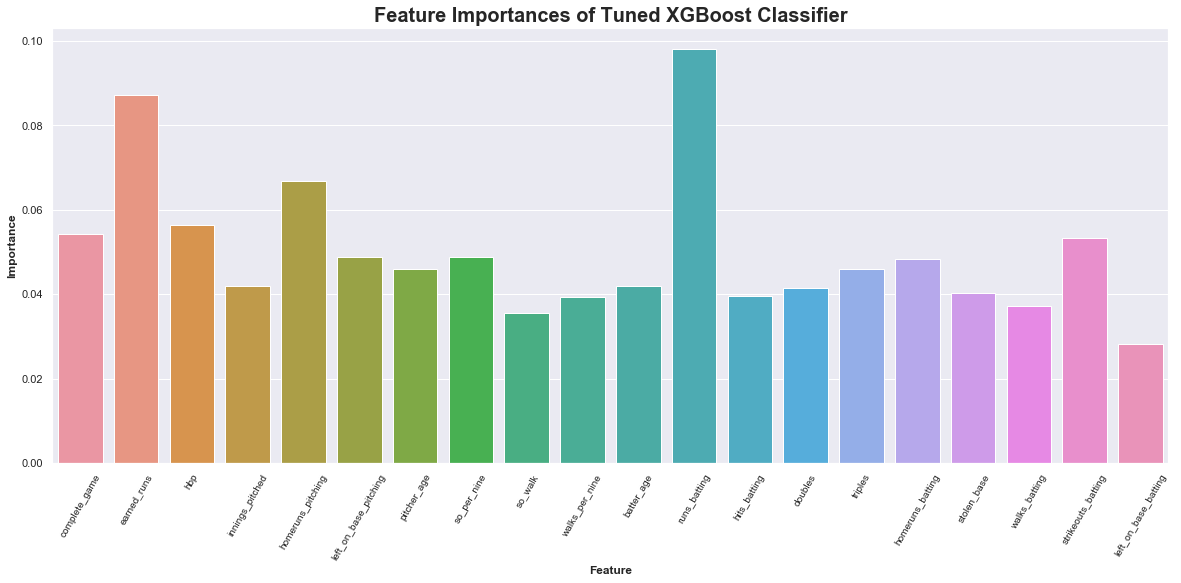

In [61]:
## Plot the feature importances of the model

plt.figure(figsize=(20, 8))
sns.barplot(x=df_features.columns, y=gs_xgb.best_estimator_.feature_importances_)
plt.title('Feature Importances of Tuned XGBoost Classifier', fontweight='bold', fontsize=20)
plt.ylabel('Importance', fontweight='bold', fontsize=12)
plt.xlabel('Feature', fontweight='bold', fontsize=12)

plt.xticks(rotation=60, size=10)

plt.show()

In [62]:
print(classification_report(xgb_proba['target'], xgb_proba['top_preds']))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        20
           1       0.80      0.80      0.80        10

   micro avg       0.87      0.87      0.87        30
   macro avg       0.85      0.85      0.85        30
weighted avg       0.87      0.87      0.87        30



# Plotting ROC AUC curves

In [63]:
## Import the necessary functions

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

In [64]:
def plot_roc_auc_curve(model, model_text, probability = True, y_actual = y_test):
    
    """
    Obatins the true and false positive rates for a model and plots the ROC AUC curve.
    """
    
    if probability:
        
        scores = model.predict_proba(X_test)[:,1]
        
    else:
        
        scores = model.predict(X_test)
        
    fpr, tpr, thresholds = roc_curve(y_actual, scores)
    
    plt.figure(figsize=(12, 8))
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc(fpr, tpr), c='green')
    plt.title('ROC AUC Curve for %s' %model_text, fontweight='bold', fontsize=18)
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.legend(loc = 'lower right', prop ={'size':20})
    
    plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    plt.show()

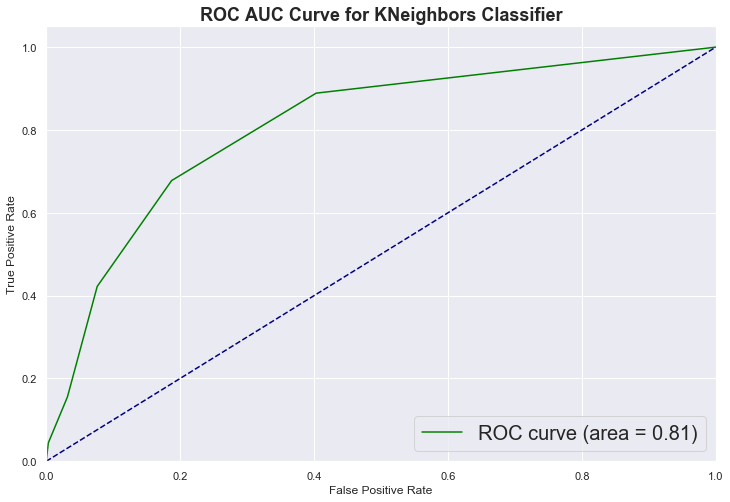

In [71]:
plot_roc_auc_curve(knc, 'KNeighbors Classifier')

In [66]:
def fpr_tpr(model, probability = True, y_actual = y_test):
    
    """
    Returns the false positive rate, true positive rate, and area under the curve for a given model.
    """
    
    if probability:
        
        scores = model.predict_proba(X_test)[:,1]
        
    else:
        
        scores = model.predict(X_test)
        
    fpr, tpr, thresholds = roc_curve(y_actual, scores)
    
    auc_ = auc(fpr, tpr)
    
    return fpr, tpr, auc_

In [67]:
fpr_lr, tpr_lr, auc_lr = fpr_tpr(gs_lr)
fpr_rf, tpr_rf, auc_rf = fpr_tpr(gs_rf)
fpr_knc, tpr_knc, auc_knc = fpr_tpr(gs_knc)
fpr_svc, tpr_svc, auc_svc = fpr_tpr(gs_svc)
fpr_xgb, tpr_xgb, auc_xgb = fpr_tpr(gs_xgb)

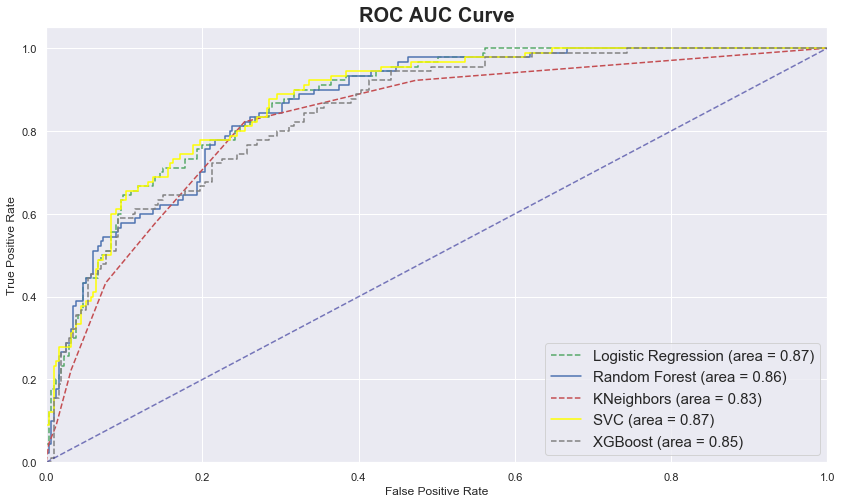

In [68]:
## Plot all the ROC AUC curves on the same plot

plt.figure(figsize=(14, 8))
plt.plot(fpr_lr, tpr_lr, label = 'Logistic Regression (area = %0.2f)' % auc(fpr_lr, tpr_lr), c = 'g', linestyle = '--')
plt.plot(fpr_rf, tpr_rf, label = 'Random Forest (area = %0.2f)' % auc(fpr_rf, tpr_rf), c = 'b')
plt.plot(fpr_knc, tpr_knc, label = 'KNeighbors (area = %0.2f)' % auc(fpr_knc, tpr_knc), c = 'r', linestyle = '--')
plt.plot(fpr_svc, tpr_svc, label = 'SVC (area = %0.2f)' % auc(fpr_svc, tpr_svc), c = 'yellow')
plt.plot(fpr_xgb, tpr_xgb, label = 'XGBoost (area = %0.2f)' % auc(fpr_xgb, tpr_xgb), c = 'gray', linestyle = '--')

plt.title('ROC AUC Curve', fontweight='bold', fontsize=20)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right', prop ={'size':15})
    
plt.plot([0, 1], [0, 1], color='navy', linestyle='--', alpha=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
    
plt.show()

# Final Exploratory Analysis

In [69]:
grpd_playoffs = df_all.groupby(by='playoffs')

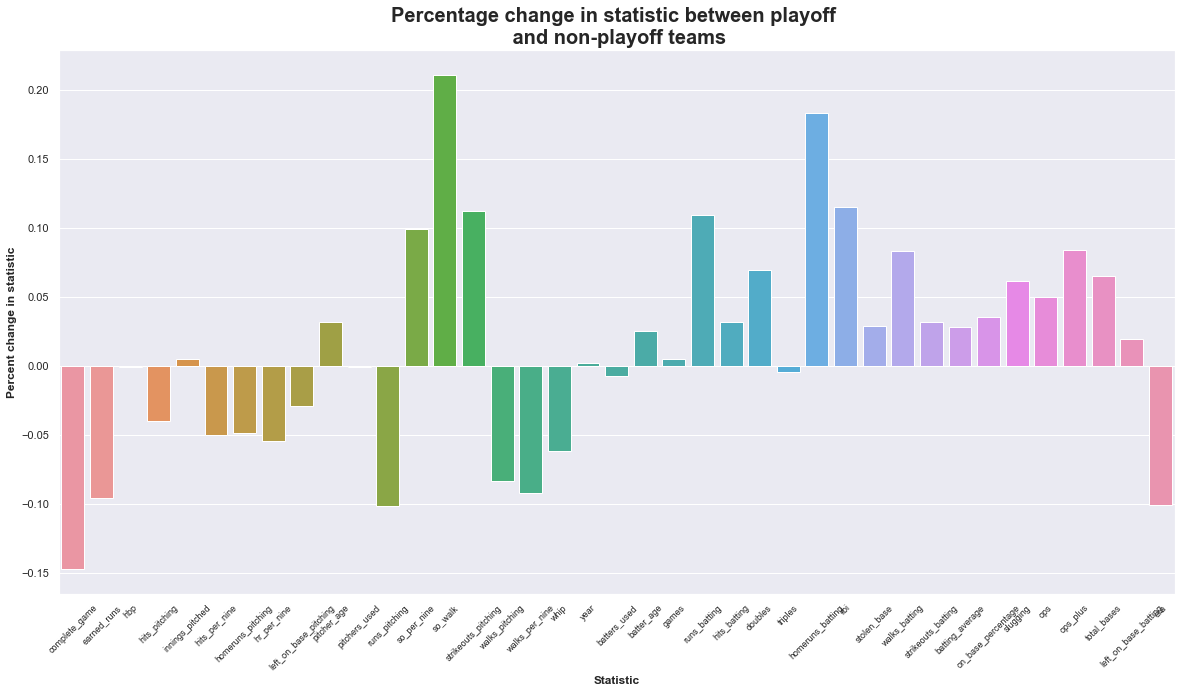

In [70]:
playoff_pct_changes = grpd_playoffs.mean().pct_change().iloc[1,:]
playoff_pct_changes.drop(['world_series'], axis=0, inplace=True)

ax = plt.figure(figsize=(20, 10))
ax = sns.barplot(x=playoff_pct_changes.index, y=playoff_pct_changes)

plt.xticks(rotation=45)
plt.ylabel('Percent change in statistic', fontweight='bold', fontsize=12)
plt.xlabel('Statistic', fontweight='bold', fontsize=12)
plt.title('Percentage change in statistic between playoff \n and non-playoff teams', fontsize=20, fontweight='extra bold')
plt.xticks(size=9)

plt.show()